해당 과제는 'Brightics Studio'로 시작하는 금융 빅데이터 분석 교재를 참고함

In [1]:
import pandas as pd 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/read_excel/대출건수현황.csv',encoding='cp949')

In [5]:
#불필요 컬럼 제거

In [6]:
len(df)

977390

In [7]:
len(df.columns)

31

In [8]:
df['나이'].unique()

array([46, 66, 27, 54, 45, 39, 37, 50, 72, 26, 42, 28, 65, 51, 61, 33, 57,
       48, 56, 55, 34, 59, 32, 53, 44, 84, 38, 40, 35, 25, 60, 76, 41, 43,
       30, 52, 49, 77, 58, 36, 62, 47, 21, 31, 71, 63, 81, 74, 85, 73, 80,
       69, 82, 64, 23, 70, 22, 83, 67, 29, 68, 24, 79, 75, 78],
      dtype=int64)

In [9]:
#df['나이'] = df['나이'].astype(int)

In [10]:
import numpy as np
df['나이'] = np.where((df.나이 >= 10)&(df.나이 < 20),"10대",
                   np.where((df['나이'] >= 30)&(df['나이'] < 40),"30대",
                           np.where((df['나이'] >= 40)&(df['나이'] < 50),"40대",
                                   np.where((df['나이'] >= 50)&(df['나이'] < 60),"50대",
                                           np.where((df['나이'] >= 60)&(df['나이'] < 70),"60대",
                                                   np.where((df['나이'] >= 20)&(df['나이'] < 30),"20대",
                                                            np.where((df['나이'] >= 70)&(df['나이'] < 80),"70대",
                                                                     np.where((df['나이'] >= 80)&(df['나이'] < 100),"80대 이상",0))))))))


In [11]:
df['나이'].unique()

array(['40대', '60대', '20대', '50대', '30대', '70대', '80대 이상'], dtype=object)

In [12]:
카운팅 = df.groupby(['성별','나이']).count()

In [13]:
카운팅.reset_index(inplace=True)

In [14]:
카운팅 = pd.pivot_table(카운팅, index = ['나이'],values =['JOIN_KEY'], columns='성별', aggfunc = ['sum'])

In [15]:
카운팅.columns

MultiIndex([('sum', 'JOIN_KEY', 1),
            ('sum', 'JOIN_KEY', 2)],
           names=[None, None, '성별'])

In [16]:
d = dict(zip(카운팅.columns.levels[1], ['1','2']))
print(d)

{'JOIN_KEY': '1'}


In [17]:
카운팅.columns

MultiIndex([('sum', 'JOIN_KEY', 1),
            ('sum', 'JOIN_KEY', 2)],
           names=[None, None, '성별'])

In [18]:
카운팅.rename(columns=d, level=1)

sum        
             1        
성별           1       2
나이                    
20대      57710   50624
30대     115398   75570
40대     142418  101936
50대     133236  102153
60대      80422   59925
70대      27560   18883
80대 이상    6444    5111

In [19]:
카운팅.sum().sum()

977390

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

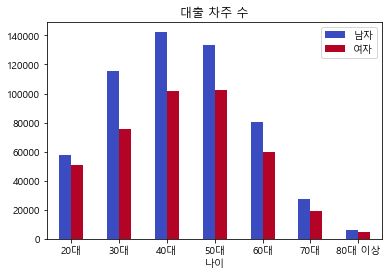

In [20]:
카운팅.plot(kind='bar', cmap='coolwarm')
plt.legend(labels=['남자','여자'])
plt.title('대출 차주 수')
plt.xticks(rotation=360)

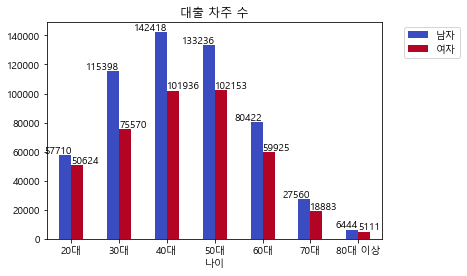

In [21]:
ax = 카운팅.plot(kind='bar', cmap='coolwarm')
for i in range(len(카운팅)):
    ax.text(x=i, y=카운팅.iloc[:,0].values[i], s=카운팅.iloc[:,0].values[i],
            horizontalalignment='right', verticalalignment ='bottom')
    ax.text(x=i, y=카운팅.iloc[:,1].values[i], s=카운팅.iloc[:,1].values[i],
            horizontalalignment='left', verticalalignment ='bottom')
    
plt.legend(labels=['남자','여자'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('대출 차주 수')
plt.xticks(rotation=360)

plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   '연령별 대출 차주수.png',bbox_inches='tight')
plt.show()

In [210]:
카운팅.iloc[:,0].sum()

563188

In [211]:
카운팅.sum(axis=0).sum()

977390

In [212]:
카운팅

sum        
       JOIN_KEY        
성별            1       2
나이                     
20대       57710   50624
30대      115398   75570
40대      142418  101936
50대      133236  102153
60대       80422   59925
70대       27560   18883
80대 이상     6444    5111

In [213]:
카운팅['남자비율'] = 카운팅.iloc[:,0]/카운팅.sum().sum()*100
카운팅['여자비율'] = 카운팅.iloc[:,1]/카운팅.sum().sum()*100

In [217]:
카운팅

sum           남자비율   여자비율
       JOIN_KEY                      
성별            1       2              
나이                                   
20대       57710   50624   5.90   5.18
30대      115398   75570  11.81   7.73
40대      142418  101936  14.57  10.43
50대      133236  102153  13.63  10.45
60대       80422   59925   8.23   6.13
70대       27560   18883   2.82   1.93
80대 이상     6444    5111   0.66   0.52

In [218]:
카운팅 = 카운팅.round(2)

In [219]:
비율 = 카운팅.iloc[:,2:]

In [372]:
비율['전체'] = 비율.sum(axis=1)

In [375]:
비율

,남자비율,여자비율,전체
,,,
성별,,,
나이,,,
20대,5.90,5.18,11.08
30대,11.81,7.73,19.54
40대,14.57,10.43,25.00
50대,13.63,10.45,24.08
60대,8.23,6.13,14.36
70대,2.82,1.93,4.75
80대 이상,0.66,0.52,1.18


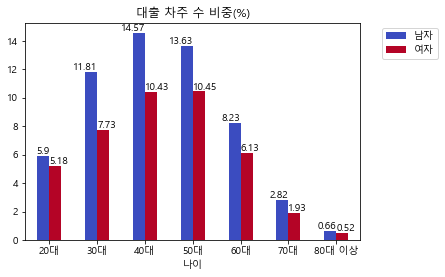

In [222]:
ax = 비율.plot(kind='bar', cmap='coolwarm')
for i in range(len(비율)):
    ax.text(x=i, y=비율.iloc[:,0].values[i], s=비율.iloc[:,0].values[i],
            horizontalalignment='right', verticalalignment ='bottom')
    ax.text(x=i, y=비율.iloc[:,1].values[i], s=비율.iloc[:,1].values[i],
            horizontalalignment='left', verticalalignment ='bottom')
plt.legend(labels=['남자','여자'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('대출 차주 수 비중(%)')
plt.xticks(rotation=360)

plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   '연령별 대출 차주수 비중.png',bbox_inches='tight')
plt.show()

# 업권

In [407]:
df.columns

Index(['JOIN_KEY', '생년월일', '성별', '나이', '은행', '상호금융', '신용카드사', '생명보험사', '손해보험사',
       '캐피탈·할부·리스·신기술사', '상호저축은행', '기타', '카드대출', '신용대출', '학자금대출', '전세자금대출',
       '예·적금담보대출', '유가증권(주식,채권,펀드 등)담보대출', '주택담보대출', '주택외부동산(토지,상가 등)담보대출',
       '지급보증(보증서)담조대출', '보금자리론', '학자금지급보증대출', '전제자금(보증서, 질권 등) 대출',
       '전세보증금 담보대출', '기타담보대출', '신차할부', '중고차할부', '기타할부', '금융리스', '운용리스'],
      dtype='object')

In [22]:
업권 = df.iloc[:,:12]

In [24]:
업권.columns

Index(['JOIN_KEY', '생년월일', '성별', '나이', '은행', '상호금융', '신용카드사', '생명보험사', '손해보험사',
       '캐피탈·할부·리스·신기술사', '상호저축은행', '기타'],
      dtype='object')

In [25]:
연령별성별_업권.head()

NameError: name '연령별성별_업권' is not defined

In [226]:
연령별성별_업권 = 업권.groupby(['나이','성별']).sum().drop(columns=['JOIN_KEY', '생년월일'])

In [227]:
연령별성별_업권.reset_index(inplace=True)

In [228]:
연령별성별_업권.set_index('나이',inplace=True)

In [229]:
연령별성별_업권.columns

Index(['성별', '은행', '상호금융', '신용카드사', '생명보험사', '손해보험사', '캐피탈·할부·리스·신기술사',
       '상호저축은행', '기타'],
      dtype='object')

In [230]:
나이20 = 연령별성별_업권.loc['20대',:]
나이30 = 연령별성별_업권.loc['30대',:]
나이40 = 연령별성별_업권.loc['40대',:]
나이50 = 연령별성별_업권.loc['50대',:]
나이60 = 연령별성별_업권.loc['60대',:]
나이70 = 연령별성별_업권.loc['70대',:]
나이80 = 연령별성별_업권.loc['80대 이상',:]

In [231]:
나이20.set_index('성별',inplace=True)
나이20 = 나이20.T

나이30.set_index('성별',inplace=True)
나이30 = 나이30.T


나이40.set_index('성별',inplace=True)
나이40 = 나이40.T


나이50.set_index('성별',inplace=True)
나이50 = 나이50.T

나이60.set_index('성별',inplace=True)
나이60 = 나이60.T


나이70.set_index('성별',inplace=True)
나이70 = 나이70.T


나이80.set_index('성별',inplace=True)
나이80 = 나이80.T

In [232]:
나이20['남자비중']= 나이20.iloc[:,0] / 나이20.sum().sum() *100
나이20['여자비중']= 나이20.iloc[:,1] / 나이20.sum().sum() *100


나이30['남자비중']= 나이30.iloc[:,0] / 나이30.sum().sum() *100
나이30['여자비중']= 나이30.iloc[:,1] / 나이30.sum().sum() *100



나이40['남자비중']= 나이40.iloc[:,0] / 나이40.sum().sum() *100
나이40['여자비중']= 나이40.iloc[:,1] / 나이40.sum().sum() *100


나이50['남자비중']= 나이50.iloc[:,0] / 나이50.sum().sum() *100
나이50['여자비중']= 나이50.iloc[:,1] / 나이50.sum().sum() *100



나이60['남자비중']= 나이60.iloc[:,0] / 나이60.sum().sum() *100
나이60['여자비중']= 나이60.iloc[:,1] / 나이60.sum().sum() *100



나이70['남자비중']= 나이70.iloc[:,0] / 나이70.sum().sum() *100
나이70['여자비중']= 나이70.iloc[:,1] / 나이70.sum().sum() *100


나이80['남자비중']= 나이80.iloc[:,0] / 나이80.sum().sum() *100
나이80['여자비중']= 나이80.iloc[:,1] / 나이80.sum().sum() *100

In [233]:
차주수 = 나이20.iloc[:,:2]

In [234]:
차주수['전체']=차주수.sum(axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [235]:
차주수

성별,1,2,전체
은행,243279,195657,438936
상호금융,28228,24984,53212
신용카드사,124312,117982,242294
생명보험사,1235,1338,2573
손해보험사,4574,3461,8035
캐피탈·할부·리스·신기술사,88541,51291,139832
상호저축은행,95451,80219,175670
기타,189432,185981,375413


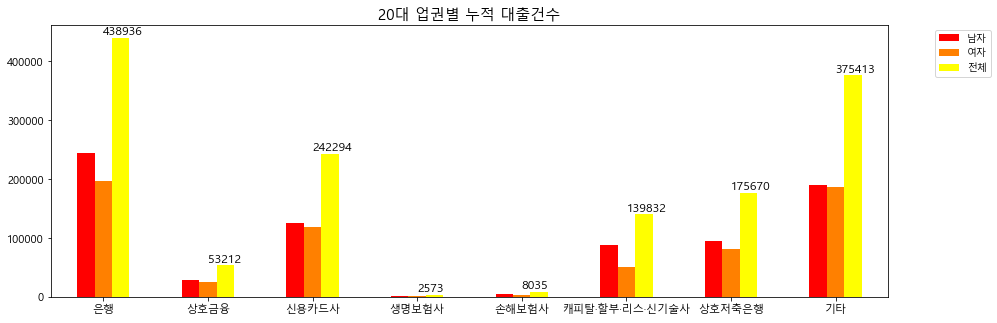

In [236]:
ax = 차주수.plot(kind='bar', cmap='autumn', figsize=(15,5), fontsize=11)

#값 표시
for i in range(len(차주수)):
    #ax.text(x=i, y=차주수.iloc[:,0].values[i], s=차주수.iloc[:,0].values[i],
    #        horizontalalignment='right', verticalalignment ='bottom',fontsize=8)
    
    #ax.text(x=i, y=차주수.iloc[:,1].values[i], s=차주수.iloc[:,1].values[i],
    #        horizontalalignment='left', verticalalignment ='bottom', fontsize=8)
    
    ax.text(x=i, y=차주수.iloc[:,2].values[i], s=차주수.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('20대 업권별 누적 대출건수',fontsize=15)
plt.xticks(rotation=360)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 1-1.20대 차주수.png',bbox_inches='tight')
plt.show()

In [237]:
나이20.iloc[:,2:]
비중['전체']=비중.sum(axis=1)
비중=비중.round(2)

In [238]:
비중.sum()

성별
남자비중     53.99
여자비중     46.02
전체      200.01
dtype: float64

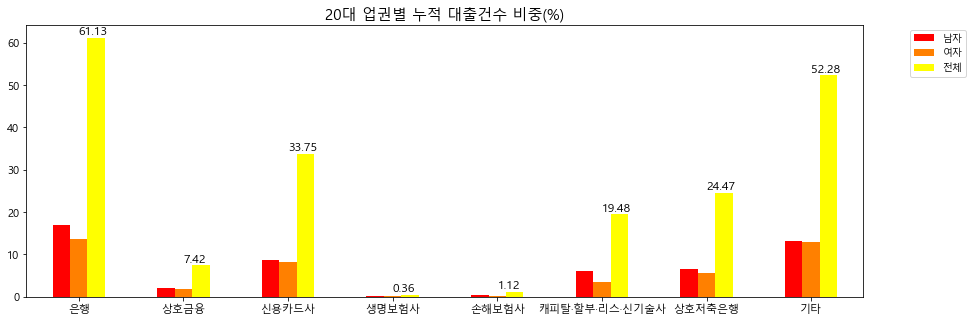

In [239]:
ax = 비중.plot(kind='bar', cmap='autumn', figsize=(15,5), fontsize=11)   
 
#값 표시
for i in range(len(비중)):
   
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('20대 업권별 누적 대출건수 비중(%)',fontsize=15)
plt.xticks(rotation=360)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 1-2.20대 차주수 비중.png',bbox_inches='tight')
plt.show()

# 30대

In [243]:
차주수 = 나이30.iloc[:,:2]
비중 = 나이30.iloc[:,2:]
차주수['전체']=차주수.sum(axis=1)
비중['전체']=비중.sum(axis=1)
비중=비중.round(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


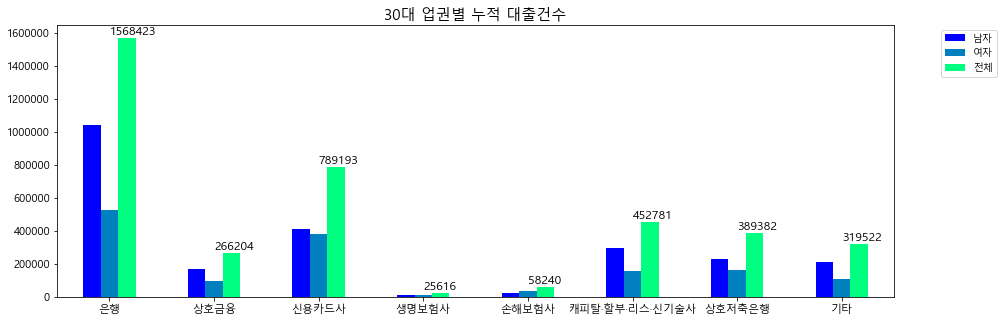

In [244]:
ax = 차주수.plot(kind='bar', cmap='winter', figsize=(15,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(차주수)):
    ax.text(x=i, y=차주수.iloc[:,2].values[i], s=차주수.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('30대 업권별 누적 대출건수',fontsize=15) ##############변경
plt.xticks(rotation=360)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 2-1.30대 차주수.png',bbox_inches='tight') ############### 변경
plt.show()

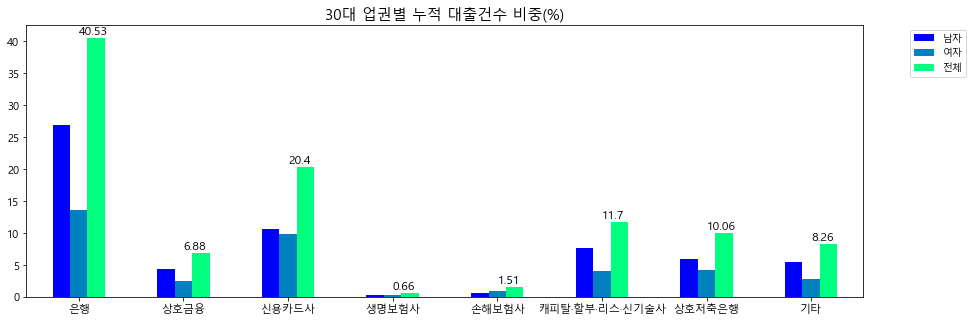

In [245]:
ax = 비중.plot(kind='bar', cmap='winter', figsize=(15,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(비중)):
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('30대 업권별 누적 대출건수 비중(%)',fontsize=15) ##############변경
plt.xticks(rotation=360)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 2-2.30대 차주수 비중.png',bbox_inches='tight') ############### 변경
plt.show()

# 40대

In [246]:
차주수 = 나이40.iloc[:,:2]
비중 = 나이40.iloc[:,2:]
차주수['전체']=차주수.sum(axis=1)
비중['전체']=비중.sum(axis=1)
비중=비중.round(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


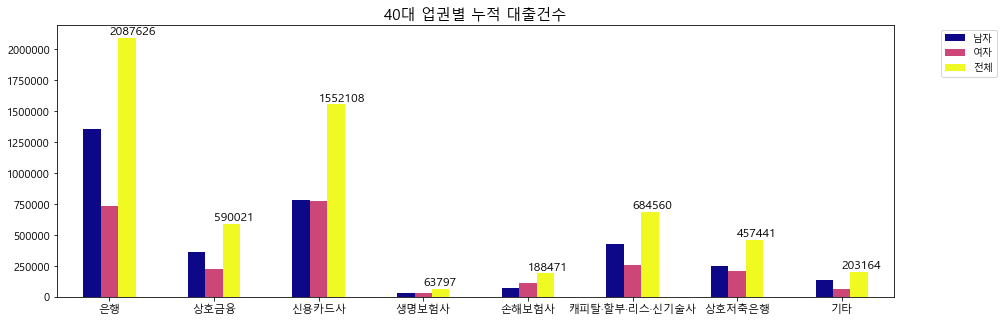

In [247]:
ax = 차주수.plot(kind='bar', cmap='plasma', figsize=(15,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(차주수)):
    ax.text(x=i, y=차주수.iloc[:,2].values[i], s=차주수.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('40대 업권별 누적 대출건수',fontsize=15) ##############변경
plt.xticks(rotation=360)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 3-1.40대 차주수.png',bbox_inches='tight') ############### 변경
plt.show()

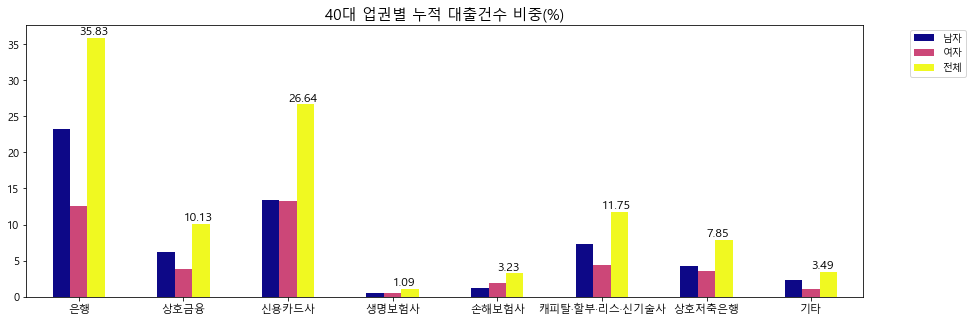

In [248]:
ax = 비중.plot(kind='bar', cmap='plasma', figsize=(15,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(비중)):
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('40대 업권별 누적 대출건수 비중(%)',fontsize=15) ##############변경
plt.xticks(rotation=360)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 3-2.40대 차주수 비중.png',bbox_inches='tight') ############### 변경
plt.show()

# 50대

In [249]:
차주수 = 나이50.iloc[:,:2]
비중 = 나이50.iloc[:,2:]
차주수['전체']=차주수.sum(axis=1)
비중['전체']=비중.sum(axis=1)
비중=비중.round(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


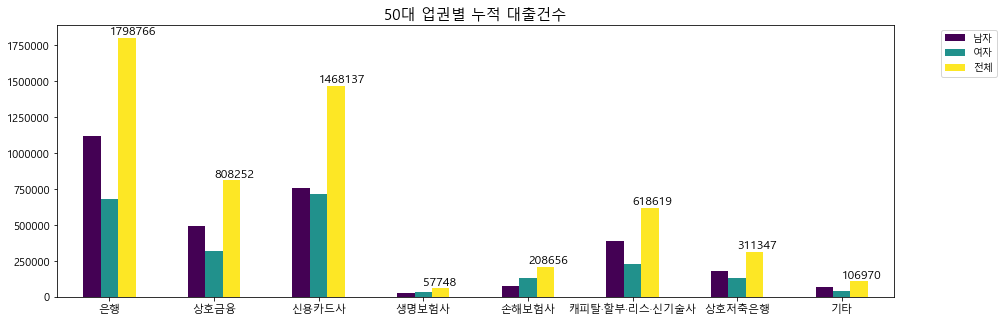

In [250]:
ax = 차주수.plot(kind='bar', cmap='viridis', figsize=(15,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(차주수)):
    ax.text(x=i, y=차주수.iloc[:,2].values[i], s=차주수.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('50대 업권별 누적 대출건수',fontsize=15) ##############변경
plt.xticks(rotation=360)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 4-1.50대 차주수.png',bbox_inches='tight') ############### 변경
plt.show()

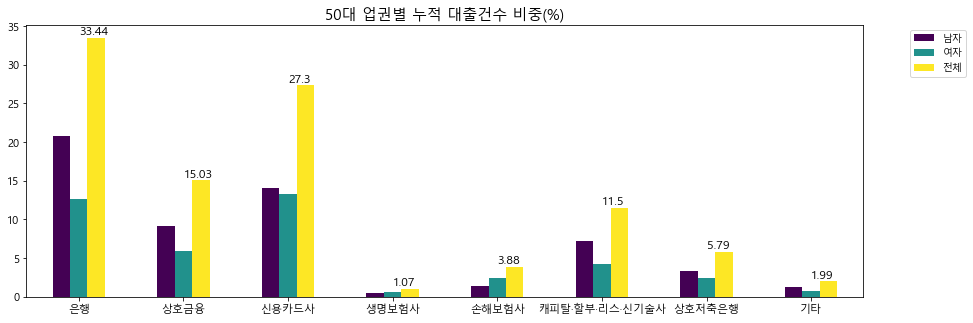

In [251]:
ax = 비중.plot(kind='bar', cmap='viridis', figsize=(15,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(비중)):
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('50대 업권별 누적 대출건수 비중(%)',fontsize=15) ##############변경
plt.xticks(rotation=360)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 4-2.50대 차주수 비중.png',bbox_inches='tight') ############### 변경
plt.show()

# 60대

In [252]:
차주수 = 나이60.iloc[:,:2]
비중 = 나이60.iloc[:,2:]
차주수['전체']=차주수.sum(axis=1)
비중['전체']=비중.sum(axis=1)
비중=비중.round(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


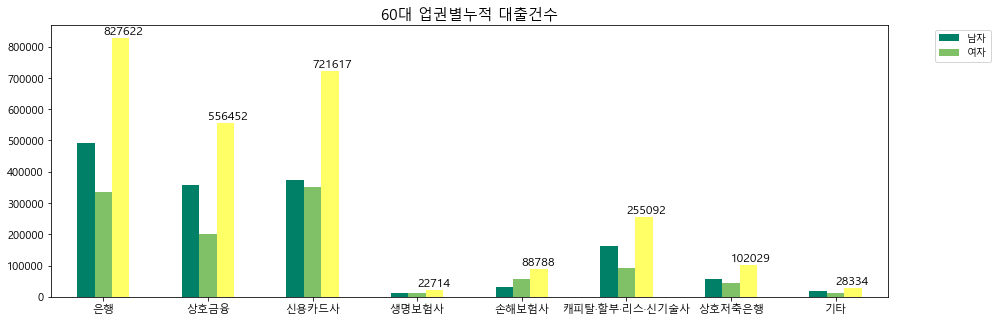

In [253]:
ax = 차주수.plot(kind='bar', cmap='summer', figsize=(15,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(차주수)):
    ax.text(x=i, y=차주수.iloc[:,2].values[i], s=차주수.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
#레전드 추가    
plt.legend(labels=['남자','여자'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('60대 업권별누적 대출건수',fontsize=15) ##############변경
plt.xticks(rotation=360)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 5-1.60대 차주수.png',bbox_inches='tight') ############### 변경
plt.show()

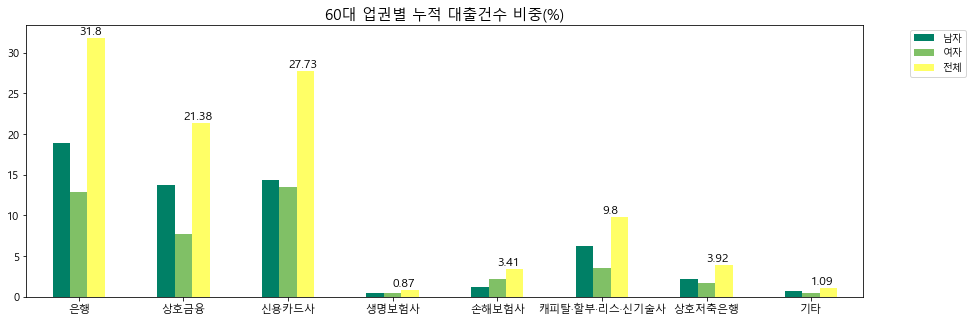

In [254]:
ax = 비중.plot(kind='bar', cmap='summer', figsize=(15,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(비중)):
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('60대 업권별 누적 대출건수 비중(%)',fontsize=15) ##############변경
plt.xticks(rotation=360)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 5-2.60대 차주수 비중.png',bbox_inches='tight') ############### 변경
plt.show()

# 70대

In [255]:
차주수 = 나이70.iloc[:,:2]
비중 = 나이70.iloc[:,2:]
차주수['전체']=차주수.sum(axis=1)
비중['전체']=비중.sum(axis=1)
비중=비중.round(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


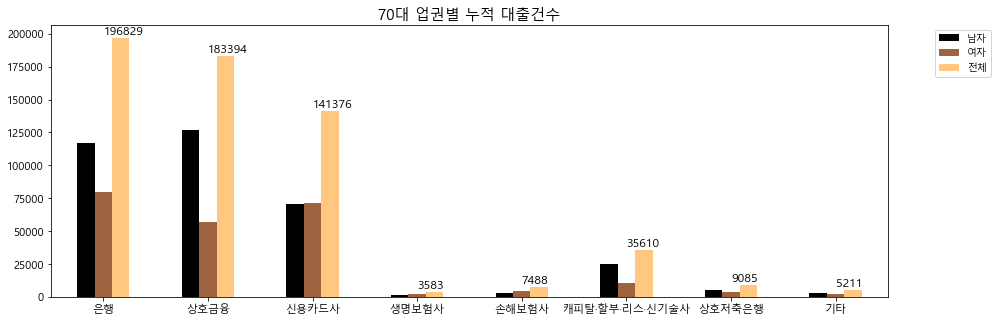

In [256]:
ax = 차주수.plot(kind='bar', cmap='copper', figsize=(15,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(차주수)):
    ax.text(x=i, y=차주수.iloc[:,2].values[i], s=차주수.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('70대 업권별 누적 대출건수',fontsize=15) ##############변경
plt.xticks(rotation=360)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 6-1.70대 차주수.png',bbox_inches='tight') ############### 변경
plt.show()

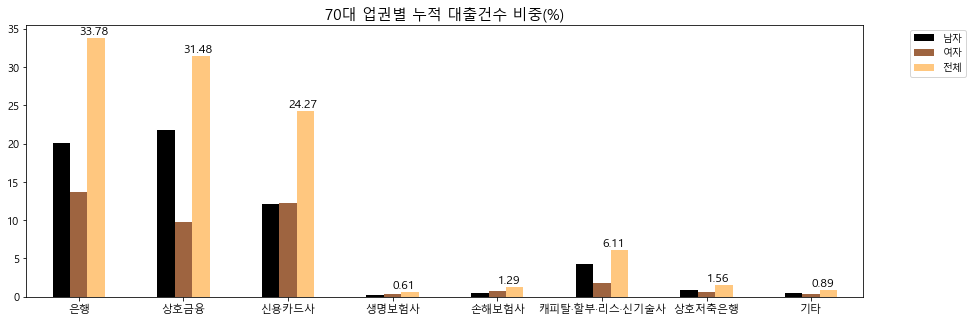

In [257]:
ax = 비중.plot(kind='bar', cmap='copper', figsize=(15,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(비중)):
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('70대 업권별 누적 대출건수 비중(%)',fontsize=15) ##############변경
plt.xticks(rotation=360)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 6-2.70대 차주수 비중.png',bbox_inches='tight') ############### 변경
plt.show()

# 80대

In [258]:
차주수 = 나이80.iloc[:,:2]
비중 = 나이80.iloc[:,2:]
차주수['전체']=차주수.sum(axis=1)
비중['전체']=비중.sum(axis=1)
비중=비중.round(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


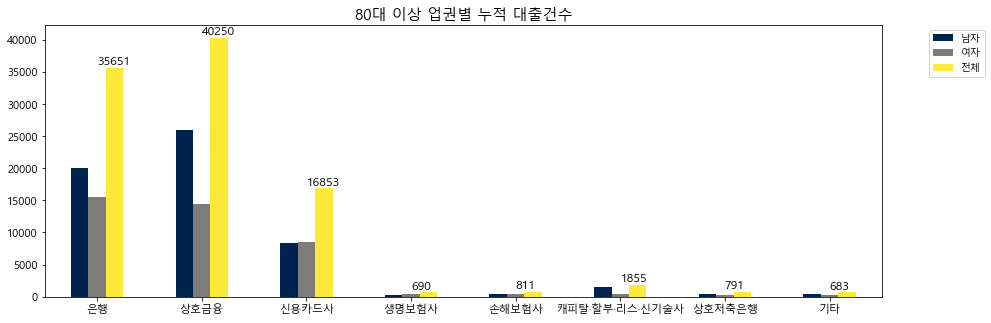

In [259]:
ax = 차주수.plot(kind='bar', cmap='cividis', figsize=(15,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(차주수)):
    ax.text(x=i, y=차주수.iloc[:,2].values[i], s=차주수.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('80대 이상 업권별 누적 대출건수',fontsize=15) ##############변경
plt.xticks(rotation=360)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 7-1.80대 차주수.png',bbox_inches='tight') ############### 변경
plt.show()

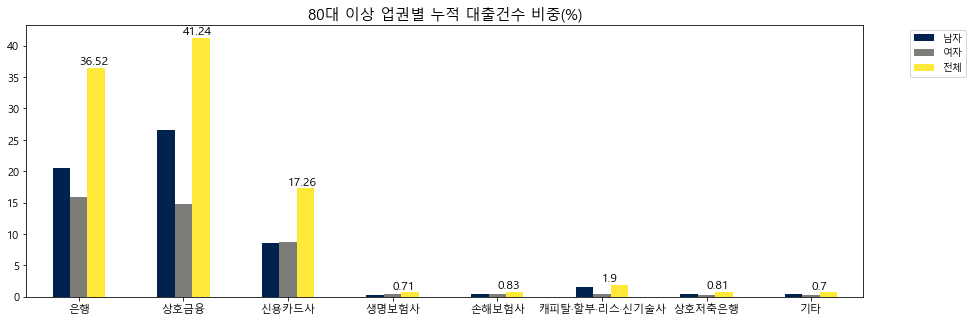

In [260]:
ax = 비중.plot(kind='bar', cmap='cividis', figsize=(15,5), fontsize=11) ####color 변경

#값 표시
for i in range(len(비중)):
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
#레전드 추가    
plt.legend(labels=['남자','여자','전체'],bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('80대 이상 업권별 누적 대출건수 비중(%)',fontsize=15) ##############변경
plt.xticks(rotation=360)


fig = ax.get_figure()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   ' 7-2.80대 차주수 비중.png',bbox_inches='tight') ############### 변경
plt.show()

In [364]:
나이20

성별,1,2,남자비중,여자비중,전체
은행,243279,195657,16.94,13.62,30.57
상호금융,28228,24984,1.97,1.74,3.71
신용카드사,124312,117982,8.66,8.22,16.87
생명보험사,1235,1338,0.09,0.09,0.18
손해보험사,4574,3461,0.32,0.24,0.56
캐피탈·할부·리스·신기술사,88541,51291,6.17,3.57,9.74
상호저축은행,95451,80219,6.65,5.59,12.23
기타,189432,185981,13.19,12.95,26.14


In [365]:
나이30

성별,1,2,남자비중,여자비중,전체
은행,1041329,527094,26.91,13.62,40.53
상호금융,170143,96061,4.40,2.48,6.88
신용카드사,411387,377806,10.63,9.76,20.40
생명보험사,13132,12484,0.34,0.32,0.66
손해보험사,26047,32193,0.67,0.83,1.51
캐피탈·할부·리스·신기술사,294400,158381,7.61,4.09,11.70
상호저축은행,228403,160979,5.90,4.16,10.06
기타,209737,109785,5.42,2.84,8.26


In [366]:
나이40

성별,1,2,남자비중,여자비중,전체
은행,1353611,734015,23.23,12.60,35.83
상호금융,364825,225196,6.26,3.86,10.13
신용카드사,780398,771710,13.39,13.24,26.64
생명보험사,31405,32392,0.54,0.56,1.09
손해보험사,73556,114915,1.26,1.97,3.23
캐피탈·할부·리스·신기술사,425436,259124,7.30,4.45,11.75
상호저축은행,249378,208063,4.28,3.57,7.85
기타,137737,65427,2.36,1.12,3.49


In [367]:
나이50

성별,1,2,남자비중,여자비중,전체
은행,1116130,682636,20.75,12.69,33.44
상호금융,490439,317813,9.12,5.91,15.03
신용카드사,754057,714080,14.02,13.28,27.30
생명보험사,26618,31130,0.49,0.58,1.07
손해보험사,77136,131520,1.43,2.45,3.88
캐피탈·할부·리스·신기술사,388052,230567,7.21,4.29,11.50
상호저축은행,179857,131490,3.34,2.44,5.79
기타,65580,41390,1.22,0.77,1.99


In [368]:
나이60

성별,1,2,남자비중,여자비중,전체
은행,491158,336464,18.87,12.93,31.80
상호금융,356890,199562,13.71,7.67,21.38
신용카드사,371927,349690,14.29,13.44,27.73
생명보험사,10735,11979,0.41,0.46,0.87
손해보험사,30560,58228,1.17,2.24,3.41
캐피탈·할부·리스·신기술사,163264,91828,6.27,3.53,9.80
상호저축은행,57478,44551,2.21,1.71,3.92
기타,17092,11242,0.66,0.43,1.09


In [369]:
나이70

성별,1,2,남자비중,여자비중,전체
은행,117253,79576,20.13,13.66,33.78
상호금융,126658,56736,21.74,9.74,31.48
신용카드사,70421,70955,12.09,12.18,24.27
생명보험사,1658,1925,0.28,0.33,0.61
손해보험사,2868,4620,0.49,0.79,1.29
캐피탈·할부·리스·신기술사,24893,10717,4.27,1.84,6.11
상호저축은행,5412,3673,0.93,0.63,1.56
기타,3239,1972,0.56,0.34,0.89


In [370]:
나이80

성별,1,2,남자비중,여자비중,전체
은행,20057,15594,20.55,15.97,36.52
상호금융,25876,14374,26.52,14.72,41.24
신용카드사,8295,8558,8.50,8.76,17.26
생명보험사,275,415,0.28,0.43,0.71
손해보험사,370,441,0.38,0.45,0.83
캐피탈·할부·리스·신기술사,1454,401,1.49,0.41,1.90
상호저축은행,442,349,0.45,0.36,0.81
기타,419,264,0.43,0.27,0.70
